<a href="https://colab.research.google.com/github/CJTAYL/.github.io/blob/main/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 High Risk Population Analysis

Link to article: https://fivethirtyeight.com/features/how-one-high-risk-community-in-rural-south-carolina-is-bracing-for-covid-19/

Data retreived from FiveThirtyEight GitHub Repository

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import io
from google.colab import data_table
data_table.enable_dataframe_formatter()

plt.rcParams["figure.dpi"] = 175

# URL for raw data from FiveThirtyEight GitHub Repository
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/covid-geography/mmsa-icu-beds.csv"

# Code to download data from URL
download = requests.get(url).content

In [83]:
# Data frame from downloaded CSV
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Code to identify the highest total percentage at risk
df['total_percent_at_risk'].max()

# Subset of data frame with total percentage at risk above 68%
percent_68 = df.loc[df['total_percent_at_risk'] > '68.00']

# List of abbreviations
Abbv = ["SL", "MB", "TP", "DB", "LR", "BR", "HN", "FL", "SC", "EV", "CN"]

# List of precentages as floats
Percent_at_risk = [68.32, 73.79, 68.10, 71.11, 73.48, 80.73, 72.66, 72.31, 68.20, 69.07, 75.97]

# Added abbreviation list to dataframe as new column
percent_68['abbreviation'] = Abbv
# Added percent as float to dataframe as new column
percent_68['percent_risk'] = Percent_at_risk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


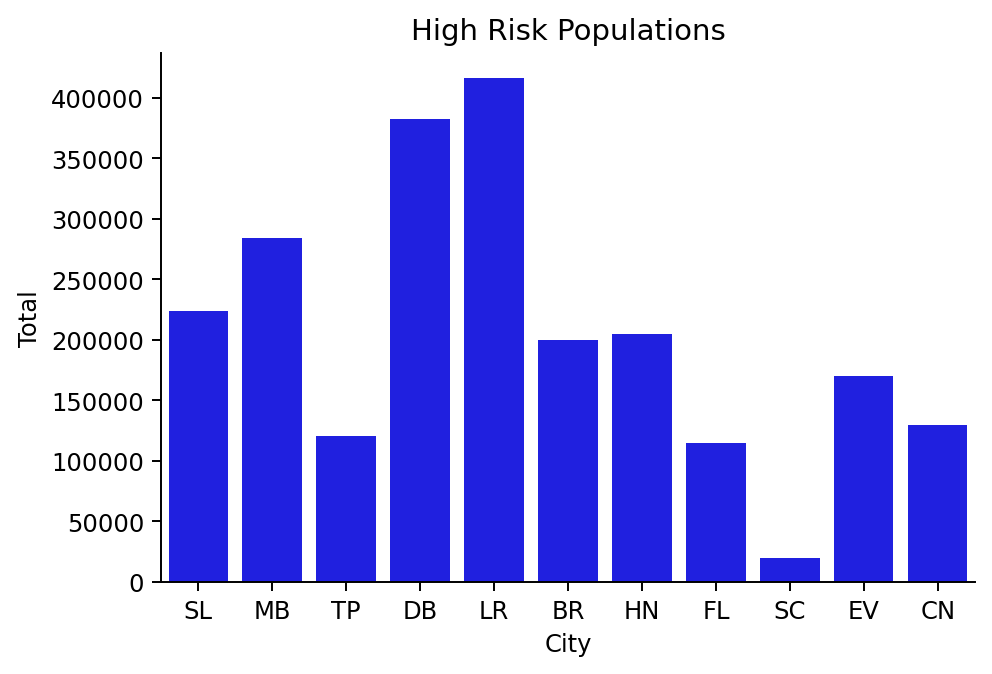

In [84]:
sns.barplot(x='abbreviation', y='total_at_risk', color='blue', data=percent_68)
plt.ylabel("Total")
plt.xlabel("City")
plt.title("High Risk Populations")
sns.despine()

Salisbury = SL, 
Myrtle Beach = MB, 
Topeka = TP, 
Daytona Beach = DB, 
Little Rock = LR, 
Bristol = BR, 
Huntington = HN, 
Florence = FL, 
Scotsbluff = SC, 
Evansville = EV, 
Charleston = CN

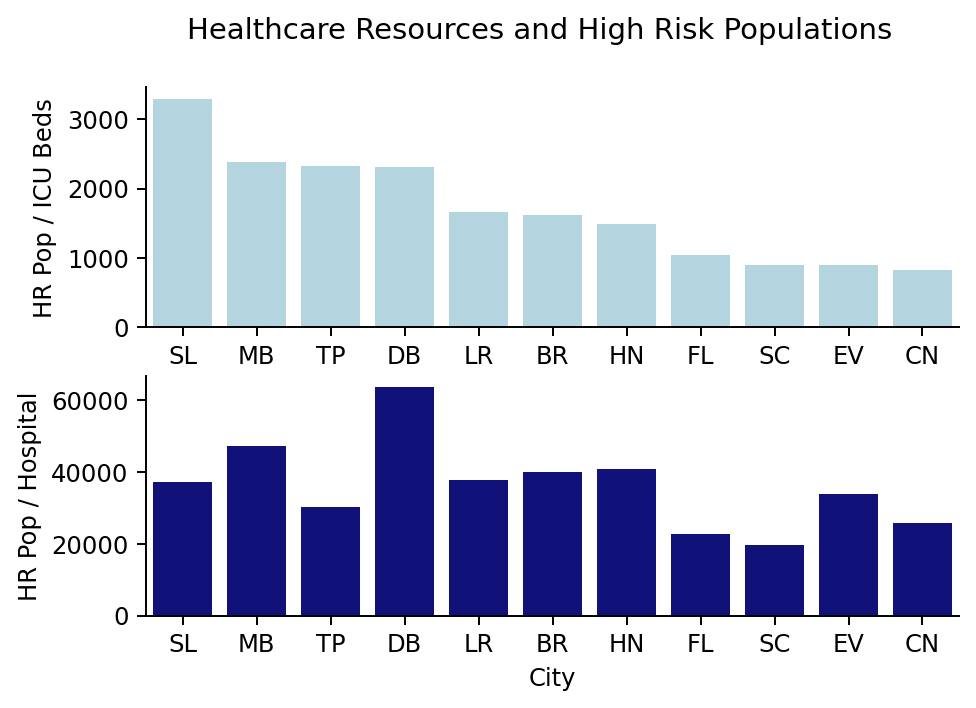

In [85]:
fig, axes = plt.subplots(2, 1)
fig.suptitle("Healthcare Resources and High Risk Populations")
sns.barplot(ax=axes[0], x='abbreviation', y='high_risk_per_ICU_bed', color='lightblue', data=percent_68)
axes[0].set_ylabel("HR Pop / ICU Beds")
sns.barplot(ax=axes[1], x='abbreviation', y='high_risk_per_hospital', color='darkblue', data=percent_68)
axes[1].set_ylabel("HR Pop / Hospital")
axes[1].set_xlabel("City")
sns.despine()